# Modelando os dados com Machine Learning

# Objetivos
Perform exploratory Data Analysis and determine Training Labels

* create a column for the class
* Standardize the data
* Split into training data and test data
-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

* Find the method performs best using test data

Realizando a análise exploratória de dados e determinando os rótulos de treinamento

* criaremos uma coluna para a classe
* Padronizaremos os dados
* Dividiremos em dados de treinamento e dados de teste
-Encontraremos os melhores hiperparâmetros para SVM, árvores de classificação e regressão logística

* Encontraremos o método com melhor desempenho usando dados de teste

# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing nos permite padronizar os dados
from sklearn import preprocessing
# Nos permite separar entre dados de teste e treinamento 
from sklearn.model_selection import train_test_split
# Nos permite testar os hiperparâmetros dos modelos e encontrar os melhores
from sklearn.model_selection import GridSearchCV
# Algoritmos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Função para plotar a matriz de confusão

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [3]:
data = pd.read_csv('dataset_part_2.csv')
X = pd.read_csv('dataset_part_3.csv')

Criando uma matriz NumPy a partir da coluna Class em data, aplicando o método to_numpy () e atribuindo à variável Y

In [4]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [5]:
# Padronizando os dados em X e reatribua-os à variável X usando a transformação abaixo.
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[-1.71291154,  0.        , -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.67441914, -1.18972425, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.63592675, -1.15742336, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       ...,
       [ 1.63592675,  2.01380177,  3.49060516, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [ 1.67441914,  2.01380177,  1.00389436, ..., -0.21566555,
         5.38516481, -0.10599979],
       [ 1.71291154, -0.51905572, -0.65391284, ..., -0.21566555,
        -0.18569534,  9.43398113]])

Dividimos os dados em dados de treinamento e teste usando a função train_test_split. Os dados de treinamento são divididos em dados de validação, um segundo conjunto usado para dados de treinamento; então os modelos são treinados e os hiperparâmetros são selecionados usando a função GridSearchCV.

Usando a função train_test_split para dividir os dados X e Y em dados de treinamento e teste. Definindo o parâmetro test_size como 0,2 e random_state como 2. Os dados de treinamento e de teste devem ser atribuídos aos seguintes rótulos.

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

#Temos 18 amostras de teste

Y_test.shape

(18,)

In [7]:
#Criando um objeto de regressão logística e depois criando um objeto GridSearchCV logreg_cv com cv = 10. Ajustando o objeto para encontrar os melhores parâmetros a partir dos parâmetros do dicionário.
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [8]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, param_grid=parameters, cv =12, verbose=1, n_jobs=-1)
logreg_cv.fit(X_train, Y_train)

Fitting 12 folds for each of 3 candidates, totalling 36 fits


GridSearchCV(cv=12, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             verbose=1)

Geramos o objeto GridSearchCV para regressão logística. Exibimos os melhores parâmetros usando o atributo de dados best_params_ e a precisão dos dados de validação usando o atributo de dados best_score_.

In [9]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8333333333333334


In [10]:
# Calculando a precisão dos dados de teste usando a pontuação do método:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, logreg_cv.predict(X_test))

0.8333333333333334

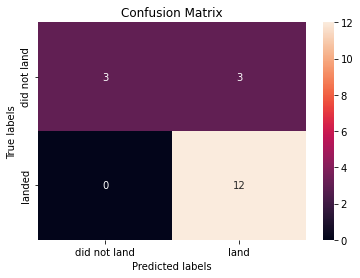

In [11]:
# Vamos ver a matriz de confusão

yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.show()

Examinando a matriz de confusão, vemos que a regressão logística pode distinguir entre as diferentes classes. Vemos que o maior problema são os falsos positivos.

Criando um objeto de máquina de vetor de suporte e criando um objeto GridSearchCV svm_cv com cv - 10. Ajustando o objeto para encontrar os melhores parâmetros dos parâmetros do dicionário.

In [12]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [13]:
svm_cv = GridSearchCV(svm, parameters, cv=10, verbose=2,n_jobs=-1)
svm_cv.fit(X_train,Y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             verbose=2)

In [14]:

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


In [15]:
#Calculando a precisão

accuracy_score(Y_test, svm_cv.predict(X_test))

0.8333333333333334

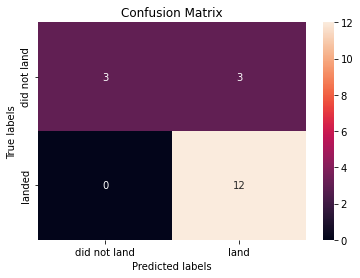

In [16]:
#Plotando a matriz de confusão

yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.show()

Criando um objeto classificador de árvore de decisão e criando um objeto GridSearchCV tree_cv com cv = 10. Ajustando o objeto para encontrar os melhores parâmetros dos parâmetros do dicionário.

In [17]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [18]:
tree_cv= GridSearchCV(tree, parameters, cv=10 , n_jobs=-1)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [19]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8892857142857142


In [20]:
# Claculando a precisão
accuracy_score(Y_test, tree_cv.predict(X_test))

0.7777777777777778

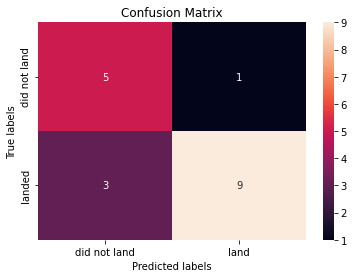

In [21]:
# Plotando a matriz de confusão

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.show()

In [22]:

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()


In [23]:
knn_cv = GridSearchCV(KNN, parameters, cv=10, n_jobs=-1)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [24]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714


In [25]:
# Calculando a precisão
accuracy_score(Y_test, knn_cv.predict(X_test))

0.7777777777777778

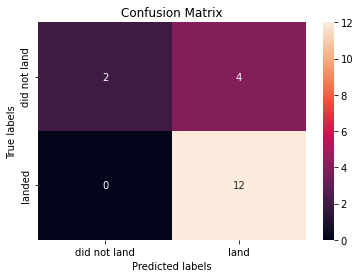

In [26]:
# Plotando a matriz de confusão
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.show()

Encontrando o melhor modelo:

Logistic regression e SVC foram igualmente bons, todos tem a mesma matriz de confusão.